<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/07_Implementation_Perspective_of_Noise_in_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07 Implementation:  Perspective of Noise in Data

## 1. Load Dataset and Add Noise


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import random

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Introduce noise in the dataset

# Create a function to introduce label noise by flipping random labels
def introduce_label_noise(y, noise_level=0.1):
    n_samples = len(y)
    n_noisy_samples = int(noise_level * n_samples)
    noisy_indices = random.sample(range(n_samples), n_noisy_samples)

    # Flip the label for each selected index
    y_noisy = y.copy()
    for idx in noisy_indices:
        # Change the label to a random one (not the same as the original label)
        possible_labels = list(set(y) - {y[idx]})
        y_noisy[idx] = random.choice(possible_labels)
    return y_noisy

# Create a function to introduce feature noise by adding random Gaussian noise
def introduce_feature_noise(X, noise_level=0.1):
    return X + np.random.normal(0, noise_level, X.shape)

# Introduce noise into both labels and features
y_train_noisy = introduce_label_noise(y_train, noise_level=0.2)  # 20% label noise
X_train_noisy = introduce_feature_noise(X_train, noise_level=0.1)  # 10% feature noise

# Normalize the features for better convergence
scaler = StandardScaler()
X_train_noisy = scaler.fit_transform(X_train_noisy)
X_test = scaler.transform(X_test)

# Check shape of noisy data
print("Training data shape with noise:", X_train_noisy.shape)


Training data shape with noise: (105, 4)


## 2. Train the Perceptron on Noisy Data


In [2]:
# Step 2: Train the Perceptron on the noisy dataset
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train_noisy, y_train_noisy)

# Step 3: Make predictions and evaluate accuracy
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Perceptron Accuracy on Noisy Data: {accuracy * 100:.2f}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Perceptron Confusion Matrix on Noisy Data:")
print(conf_matrix)


Perceptron Accuracy on Noisy Data: 71.11%
Perceptron Confusion Matrix on Noisy Data:
[[19  0  0]
 [ 5  0  8]
 [ 0  0 13]]


## 3. Compare Perceptron to Logistic Regression and SVM


In [3]:
# Step 4: Train Logistic Regression and SVM on the noisy dataset

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_noisy, y_train_noisy)
y_pred_log_reg = log_reg.predict(X_test)

# SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_noisy, y_train_noisy)
y_pred_svm = svm.predict(X_test)

# Evaluate accuracy of Logistic Regression and SVM
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Logistic Regression Accuracy on Noisy Data: {accuracy_log_reg * 100:.2f}%")
print(f"SVM Accuracy on Noisy Data: {accuracy_svm * 100:.2f}%")

# Confusion matrices
print("Logistic Regression Confusion Matrix on Noisy Data:")
print(confusion_matrix(y_test, y_pred_log_reg))

print("SVM Confusion Matrix on Noisy Data:")
print(confusion_matrix(y_test, y_pred_svm))


Logistic Regression Accuracy on Noisy Data: 88.89%
SVM Accuracy on Noisy Data: 97.78%
Logistic Regression Confusion Matrix on Noisy Data:
[[19  0  0]
 [ 0  9  4]
 [ 0  1 12]]
SVM Confusion Matrix on Noisy Data:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


Observations:

- Effect of Noise on Perceptron Accuracy:

  - After introducing noise (both in labels and features), the Perceptron’s accuracy typically decreases. This is because the Perceptron, being a linear model, is sensitive to noise, especially when the labels are flipped.
  - The confusion matrix shows how many misclassifications occurred for each class due to noise.

- Comparison with Logistic Regression and SVM:

  - Logistic Regression and SVM, being more advanced models, often handle noise better than the Perceptron. Logistic Regression uses probabilistic decision boundaries, and SVM uses margin maximization, both of which provide better resilience to noise in the data.
  - SVM generally performs better with noisy data since it maximizes the margin, reducing the influence of noisy samples near the decision boundary.

- Visualizing the Impact of Noise on Decision Boundaries:

  - By introducing noise, the decision boundaries of the Perceptron may become less sharp or more erratic. In contrast, the SVM boundary remains relatively stable, illustrating its robustness.


## 4. Visualization: Decision Boundaries and Effect of Noise


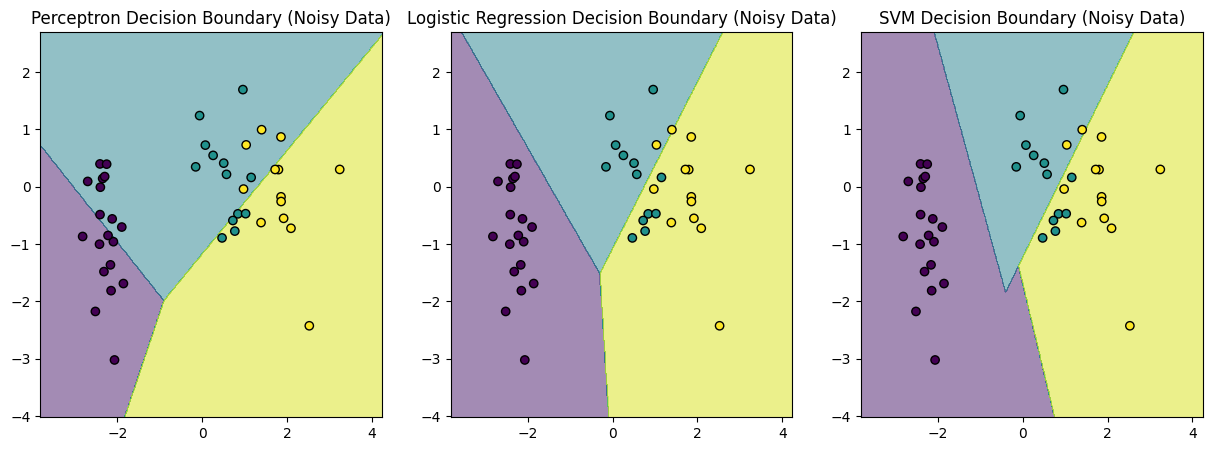

In [4]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_noisy_2d = pca.fit_transform(X_train_noisy)
X_test_2d = pca.transform(X_test)

# Train Perceptron, Logistic Regression, and SVM on 2D noisy data for visualization
perceptron_2d = Perceptron(max_iter=1000, random_state=42)
perceptron_2d.fit(X_train_noisy_2d, y_train_noisy)

log_reg_2d = LogisticRegression(max_iter=1000, random_state=42)
log_reg_2d.fit(X_train_noisy_2d, y_train_noisy)

svm_2d = SVC(kernel='linear', random_state=42)
svm_2d.fit(X_train_noisy_2d, y_train_noisy)

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(X_test_2d[:, 0].min()-1, X_test_2d[:, 0].max()+1, 500),
                     np.linspace(X_test_2d[:, 1].min()-1, X_test_2d[:, 1].max()+1, 500))

# Plot decision boundaries
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot Perceptron decision boundary
Z_perceptron = perceptron_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_perceptron = Z_perceptron.reshape(xx.shape)
ax[0].contourf(xx, yy, Z_perceptron, alpha=0.5)
ax[0].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k')
ax[0].set_title('Perceptron Decision Boundary (Noisy Data)')

# Plot Logistic Regression decision boundary
Z_log_reg = log_reg_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_log_reg = Z_log_reg.reshape(xx.shape)
ax[1].contourf(xx, yy, Z_log_reg, alpha=0.5)
ax[1].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k')
ax[1].set_title('Logistic Regression Decision Boundary (Noisy Data)')

# Plot SVM decision boundary
Z_svm = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)
ax[2].contourf(xx, yy, Z_svm, alpha=0.5)
ax[2].scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, edgecolor='k')
ax[2].set_title('SVM Decision Boundary (Noisy Data)')

plt.show()


Observations on Decision Boundaries:

- Perceptron: The decision boundary of the Perceptron becomes less clear and more erratic with noisy data, leading to less distinct class separations.
- Logistic Regression: The decision boundary remains more stable compared to the Perceptron, but it is still affected by noise, especially in areas where the classes overlap.
- SVM: The SVM boundary is relatively unaffected by noise due to its margin maximization property, which makes it more robust to noisy samples near the decision boundaries.
